<div align="center">
    <h2>Graduate Rotational Internship Program</h2>
    <h2>@The Spark Foundation</h2>
    <h3>Task#2: Prediction using Unsupervised ML (Level- Beginner)</h3>
    <h3>Author: Arsal Raza</h3>
</div><br>


### From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

**Dataset:**
[Download Iris Dataset](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)

**Task:**
### Predict the optimum number of clusters and represent it visually.

### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Load the data

In [2]:
data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Exploring the data

In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Summary statistics
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
# Check for missing values
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# Drop the 'Species' column for clustering
data = data.drop(columns=['Species'])

#### To determine the value of K we will use Elbow Method

### Elbow Method

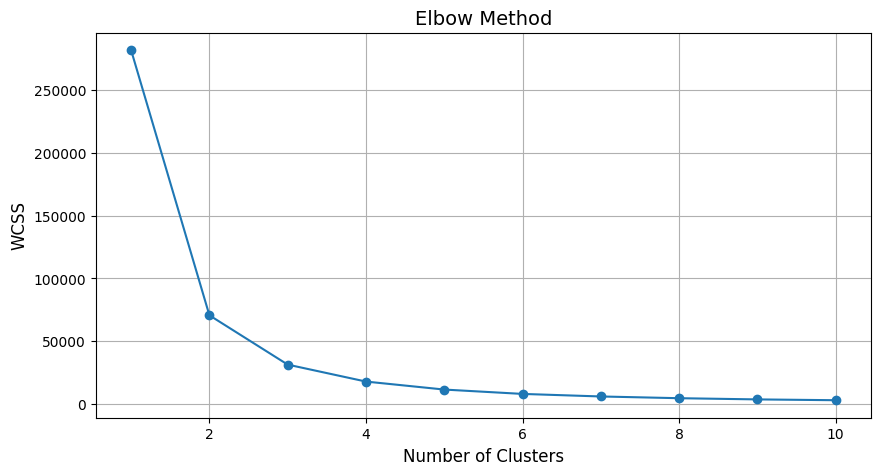

In [8]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

### Apply K-Means Clustering

In [9]:
# Applying K-Means clustering with the optimum number of clusters (assume it's 3 from the Elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data)

# Adding the cluster labels to the original dataset
data['Cluster'] = clusters
data['Cluster_Label'] = data['Cluster'].map({0: 'Iris-setosa', 1: 'Iris-versicolour', 2: 'Iris-virginica'})

# Display the first few rows with the cluster labels
print(data.tail())


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster  \
145  146            6.7           3.0            5.2           2.3        2   
146  147            6.3           2.5            5.0           1.9        2   
147  148            6.5           3.0            5.2           2.0        2   
148  149            6.2           3.4            5.4           2.3        2   
149  150            5.9           3.0            5.1           1.8        2   

      Cluster_Label  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


### Visualize the Clusters

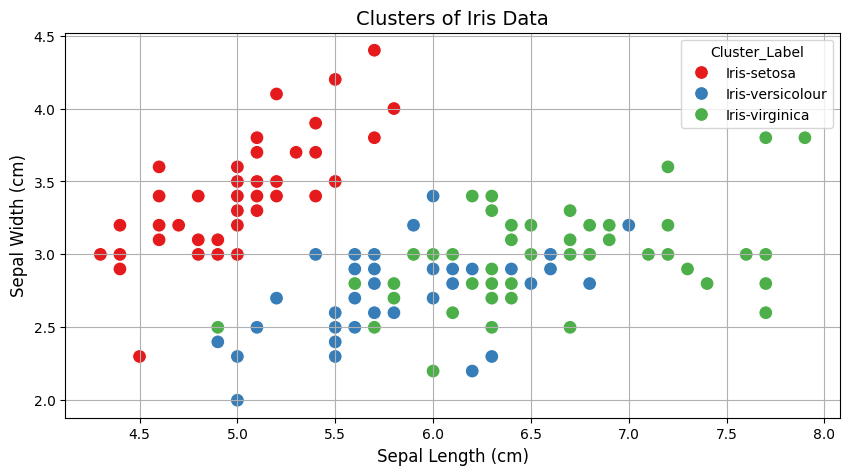

In [10]:
# Visualizing the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Cluster_Label', palette='Set1', s=100)

plt.title('Clusters of Iris Data', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.grid(True)
plt.show()
